In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import xgboost
from sklearn.metrics import mean_squared_error, r2_score, f1_score
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
sns.set_style('whitegrid')

In [2]:
dfPuntos = pd.read_csv("../dataLimpio/dfPuntos.csv",index_col=0)
dfPuntos

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,female,male,wep,activity_category
id,,,,,,,,,,,,
1,male,58,187,87,23,111,40.8,190,False,True,138,7
2,male,39,165,69,30,108,41.0,195,False,True,150,7
3,female,60,152,54,3,86,38.5,14,True,False,12,5
4,male,22,188,80,11,86,40.1,28,False,True,44,5
5,male,41,178,87,15,83,40.3,48,False,True,60,5
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,female,23,160,58,26,101,40.7,144,True,False,130,7
9997,female,57,161,61,23,102,40.5,143,True,False,115,7
9998,male,36,172,70,7,87,39.3,22,False,True,28,5


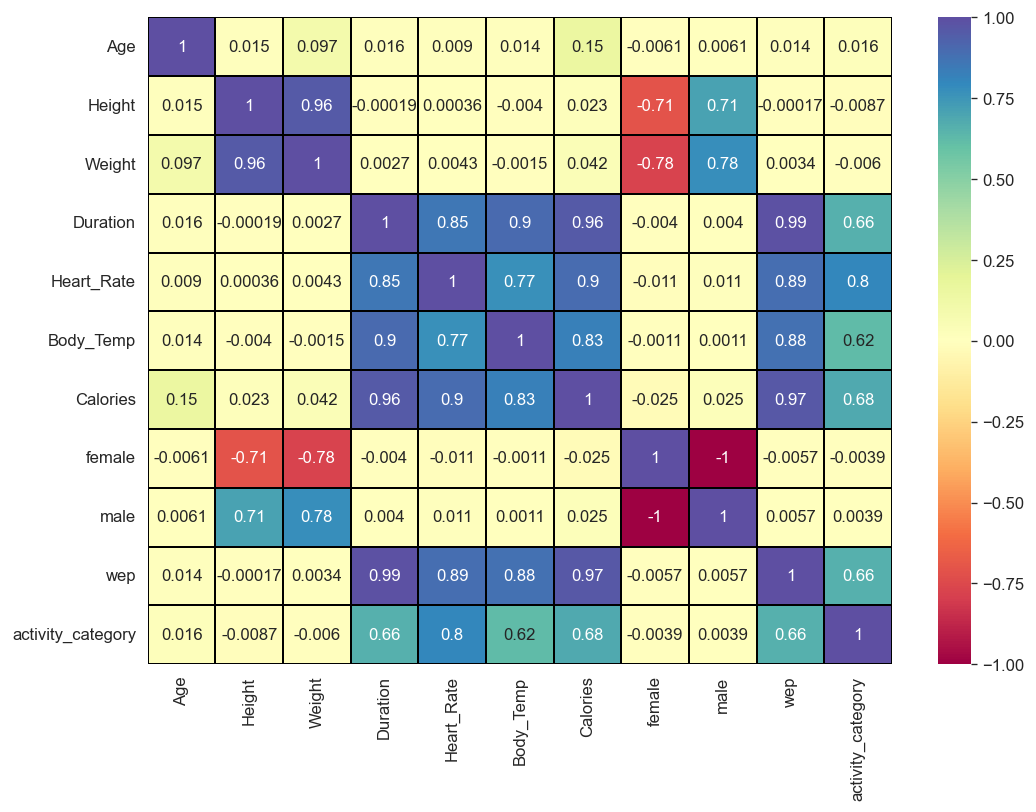

In [4]:
sns.heatmap(dfPuntos.corr(numeric_only=True), annot=True,vmax=1,vmin=-1,cmap="Spectral", linecolor="black",linewidths=1);

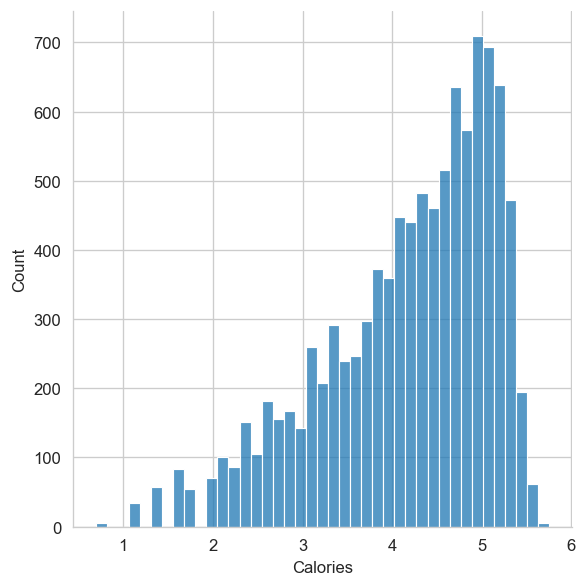

In [5]:
sns.displot(np.log1p(dfPuntos['Calories']));

In [6]:
dfPuntos.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories', 'female', 'male', 'wep', 'activity_category'],
      dtype='object')

In [7]:
X = dfPuntos[['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate','female', 'male', 'wep', 'activity_category']]
yLog = np.log1p(dfPuntos["Calories"])

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, yLog, test_size = 0.20, random_state=42) 

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
import xgboost


X_train, X_test, y_train, y_test = train_test_split(X, yLog, test_size=0.2, random_state=42)

# Define different regression models within pipelines
models = {
    'Linear Regression': Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())]),
    'Ridge Regression': Pipeline([('scaler', StandardScaler()), ('model', Ridge())]),
    'Lasso Regression': Pipeline([('scaler', StandardScaler()), ('model', Lasso())]),
    'Random Forest': Pipeline([('scaler', StandardScaler()), ('model', RandomForestRegressor(random_state=42))]),
    'XGBoost': Pipeline([('scaler', StandardScaler()), ('model', xgboost.XGBRegressor(objective='reg:squarederror', random_state=42))])
}

# Define hyperparameter distributions for RandomizedSearchCV
param_distributions = {
    'Ridge Regression': {'model__alpha': [0.1, 1.0, 10.0]},
    'Lasso Regression': {'model__alpha': [0.001, 0.01, 0.1]},
    'Random Forest': {
        'model__n_estimators': [100, 200, 500],
        'model__max_depth': [5, 10, 15],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    },
    'XGBoost': {
        'model__learning_rate': [0.01, 0.1, 0.3],
        'model__n_estimators': [100, 200, 500],
        'model__max_depth': [3, 5, 8],
        'model__gamma': [0, 0.1, 0.5]
    }
}

# Perform RandomizedSearchCV for each model
for name, model in models.items():
    param_grid = param_distributions.get(name, None)  # Use specific grid if defined, otherwise None
    if param_grid:
        random_search = RandomizedSearchCV(model, param_distributions=param_grid, cv=3, n_iter=50)
        random_search.fit(X_train, y_train)
        best_model = random_search.best_estimator_
        best_mse = random_search.best_score_
        print(f"{name} Best MSE: {best_mse:.2f}")


best_model.fit(X_train, y_train)
predicted_calories = best_model.predict(X_test)


print("Predicted calories for new data:", np.log1p(predicted_calories))


C:\Users\nicoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 3 is smaller than n_iter=50. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Ridge Regression Best MSE: 0.92


C:\Users\nicoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 3 is smaller than n_iter=50. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Lasso Regression Best MSE: 0.92
Random Forest Best MSE: 1.00
XGBoost Best MSE: 1.00
Predicted calories for new data: [5.306093  4.6626816 4.905674  ... 5.318545  3.9584832 4.547417 ]


In [29]:
best_model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('model',
   XGBRegressor(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=0, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.1, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=3, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=500, n_jobs=None,
                num_parallel_tree=None, random_state=42, ...))],
 'verbose': False,
 'scaler': StandardScaler(),
 'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, c

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import RandomizedSearchCV

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Si solo es el modelo, no hará falta meterlo en un pipeline

gbr_model = GradientBoostingRegressor(n_estimators=500 , learning_rate= 0.1, max_depth= 4, min_samples_leaf= 1, min_samples_split= 6,random_state=42,verbose=1)

import xgboost

xgb_model = xgboost.XGBRegressor(random_state=42)

rand_forest = Pipeline([("scaler",StandardScaler(),None),
                ("rand_forest",RandomForestClassifier(n_estimators=200 , max_depth= 4))
               ])

svm = Pipeline([("scaler",StandardScaler()),
                ("selectkbest",SelectKBest()),
                ("svm",SVC())
               ])


reg_log = Pipeline([("imputer",SimpleImputer()),
                    ("scaler",StandardScaler()),
                    ("reglog",LogisticRegression())
                   ])


grid_random_forest = {}


svm_param = {                    
            'selectkbest__k': [1,2,3],
            'svm__C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 
            'svm__kernel': ["linear","poly","rbf"],
            'svm__coef0': [-10.,-1., 0., 0.1, 0.5, 1, 10, 100],
            'svm__gamma': ('scale', 'auto')
            }


reg_log_param = {    
                 "imputer__strategy": ['mean', 'median', 'most_frequent'],
                 "reglog__penalty": ["l1","l2"], 
                 "reglog__C": np.logspace(0, 4, 10)
                }

In [25]:
# Almaceno en una lista de tuplas los modelos (nombre que le pongo, el modelo, hiperparametros)
models = [('rand_forest', rand_forest, grid_random_forest),
         ('svm', svm, svm_param),
         ('reg_log', reg_log, reg_log_param),
         ('gbr_model', gbr_model),
         ('xgb_model', xgb_model),]

# Declaro en un diccionario los pipelines e hiperparametros
models_gridsearch = {}

for i in models:
    models_gridsearch[i[0]] = RandomizedSearchCV(i[1],
                                          i[2],
                                          cv=2,
                                          scoring="accuracy",
                                          verbose=1)
    
    models_gridsearch[i[0]].fit(X_train, y_train)

C:\Users\nicoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits


ValueError: 
All the 2 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nicoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nicoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\nicoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\pipeline.py", line 470, in fit
    routed_params = self._check_method_params(method="fit", props=params)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\nicoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\pipeline.py", line 360, in _check_method_params
    **{
      ^
  File "C:\Users\nicoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\pipeline.py", line 362, in <dictcomp>
    for name, step in self.steps
        ^^^^^^^^^^
ValueError: too many values to unpack (expected 2)


In [ ]:
best_grids = [(i, j.best_score_) for i, j in models_gridsearch.items()]

best_grids = pd.DataFrame(best_grids, columns=["Grid", "Best score"]).sort_values(by="Best score", ascending=False)
best_grids

,Grid,Best score
2,reg_log,0.958333
0,rand_forest,0.950000
1,svm,0.950000
